In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

--- Крок 1: Виконується завантаження та візуалізація даних ---


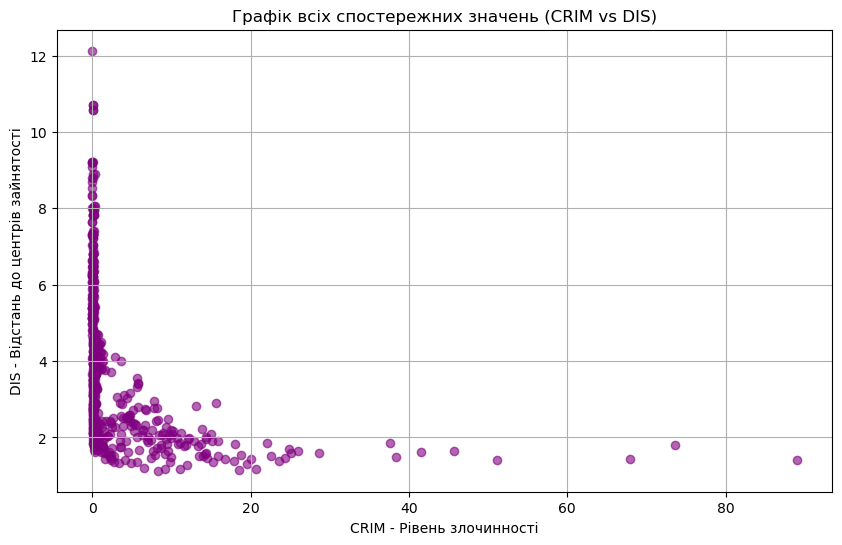

In [10]:
# --- Крок 1: Завантаження та візуалізація початкових даних ---
print("--- Крок 1: Виконується завантаження та візуалізація даних ---")
try:
    data = pd.read_csv('boston_housing_real.csv', sep='\s+', engine='python', skiprows=22, header=None)
except FileNotFoundError:
    print("Помилка: Файл 'boston_housing_real.csv' не знайдено.")
    exit()

# Вибираємо 1-й CRIM та 8-й DIS стовпці
selected_data = data.iloc[:, [0, 7]]
selected_data.columns = ['CRIM', 'DIS']

plt.figure(figsize=(10, 6))
plt.scatter(selected_data['CRIM'], selected_data['DIS'], color='purple', alpha=0.6)
plt.title('Графік всіх спостережних значень (CRIM vs DIS)')
plt.xlabel('CRIM - Рівень злочинності')
plt.ylabel('DIS - Відстань до центрів зайнятості')
plt.grid(True)
plt.show() 


--- Крок 2: Виконується розділення вибірки ---
Розмір дослідної вибірки: 404 рядків
Розмір тестової вибірки: 102 рядків


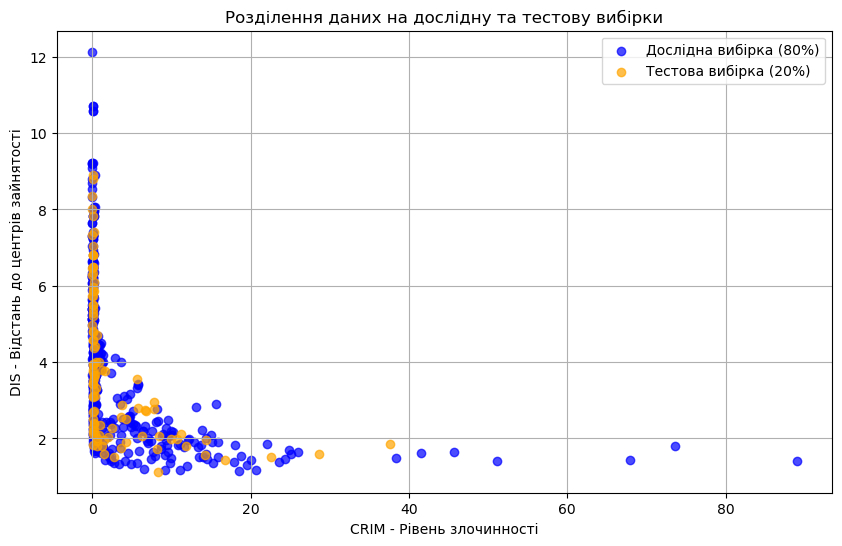

In [11]:
# --- Крок 2: Розділення вибірки на дослідну та тестову ---
print("\n--- Крок 2: Виконується розділення вибірки ---")
# Перемішуємо дані для випадкового розділення
shuffled_data = selected_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Розділяємо: 80% - дослідна, 20% - тестова
split_index = int(0.8 * len(shuffled_data))
train_data = shuffled_data[:split_index]
test_data = shuffled_data[split_index:]

print(f"Розмір дослідної вибірки: {len(train_data)} рядків")
print(f"Розмір тестової вибірки: {len(test_data)} рядків")

plt.figure(figsize=(10, 6))
plt.scatter(train_data['CRIM'], train_data['DIS'], color='blue', label='Дослідна вибірка (80%)', alpha=0.7)
plt.scatter(test_data['CRIM'], test_data['DIS'], color='orange', label='Тестова вибірка (20%)', alpha=0.7)
plt.title('Розділення даних на дослідну та тестову вибірки')
plt.xlabel('CRIM - Рівень злочинності')
plt.ylabel('DIS - Відстань до центрів зайнятості')
plt.legend()
plt.grid(True)
plt.show() 


--- Крок 3: Розрахунок та візуалізація центру мас ---
Координати центру мас дослідної вибірки: (X=3.7900, Y=3.7923)


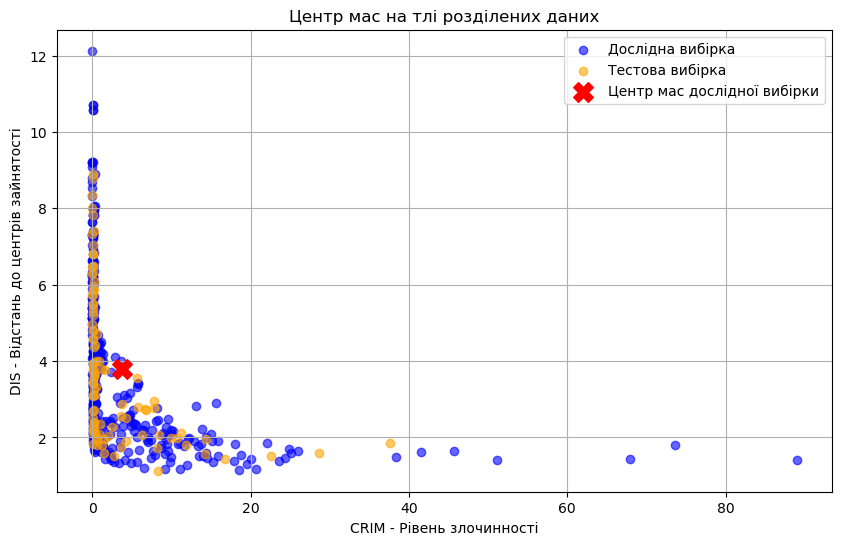

In [13]:
# --- Крок 3: Знаходження та візуалізація центру мас дослідної вибірки ---
print("\n--- Крок 3: Розрахунок та візуалізація центру мас ---")
# Центр мас - це середнє значення по кожній осі для дослідної вибірки
centroid_x = train_data['CRIM'].mean()
centroid_y = train_data['DIS'].mean()

print(f"Координати центру мас дослідної вибірки: (X={centroid_x:.4f}, Y={centroid_y:.4f})")

plt.figure(figsize=(10, 6))
plt.scatter(train_data['CRIM'], train_data['DIS'], color='blue', label='Дослідна вибірка', alpha=0.6)
plt.scatter(test_data['CRIM'], test_data['DIS'], color='orange', label='Тестова вибірка', alpha=0.6)
# Малюємо точку центру мас
plt.scatter(centroid_x, centroid_y, color='red', marker='X', s=200, label='Центр мас дослідної вибірки', zorder=5)
plt.title('Центр мас на тлі розділених даних')
plt.xlabel('CRIM - Рівень злочинності')
plt.ylabel('DIS - Відстань до центрів зайнятості')
plt.legend()
plt.grid(True)
plt.show() 

In [5]:
# --- Крок 4: Перебір коефіцієнтів та розрахунок похибок ---
print("\n--- Крок 4: Виконується перебір коефіцієнтів регресії... ---")
b0_range = np.linspace(3.5, 5.0, 100)
b1_range = np.linspace(-0.5, 0.2, 100)

x_train = train_data['CRIM'].values
y_train = train_data['DIS'].values

# Створюємо список для зберігання всіх результатів (mse, b0, b1)
results = []
for b0 in b0_range:
    for b1 in b1_range:
        y_pred = b0 + b1 * x_train
        mse = np.mean((y_train - y_pred)**2)
        results.append((mse, b0, b1))


--- Крок 4: Виконується перебір коефіцієнтів регресії... ---



--- Крок 5: Пошук найкращої регресії та її візуалізація ---
Знайдено оптимальні коефіцієнти:
  - b0 (зсув): 4.1364
  - b1 (нахил): -0.0899
  - Мінімальна MSE на дослідній вибірці: 3.9389


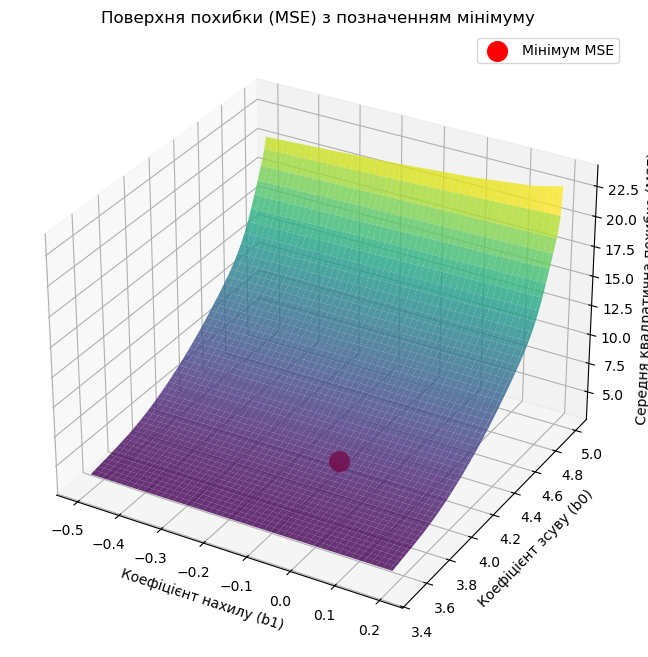

In [12]:
# --- Крок 5: Пошук найкращої регресії та візуалізація поверхні похибки ---
print("\n--- Крок 5: Пошук найкращої регресії та її візуалізація ---")
results.sort(key=lambda x: x[0])
best_model = results[0]
min_mse, best_b0, best_b1 = best_model

print(f"Знайдено оптимальні коефіцієнти:")
print(f"  - b0 (зсув): {best_b0:.4f}")
print(f"  - b1 (нахил): {best_b1:.4f}")
print(f"  - Мінімальна MSE на дослідній вибірці: {min_mse:.4f}")

B0_mesh, B1_mesh = np.meshgrid(b0_range, b1_range)
mse_grid = np.array([res[0] for res in results]).reshape(len(b0_range), len(b1_range))

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(B1_mesh, B0_mesh, mse_grid.T, cmap='viridis', alpha=0.8, edgecolor='none')
ax.scatter(best_b1, best_b0, min_mse, color='red', s=200, label='Мінімум MSE', depthshade=True)
ax.set_title('Поверхня похибки (MSE) з позначенням мінімуму')
ax.set_xlabel('Коефіцієнт нахилу (b1)')
ax.set_ylabel('Коефіцієнт зсуву (b0)')
ax.set_zlabel('Середня квадратична похибка (MSE)')
ax.legend()
plt.show() 


--- Крок 6: Похибки трьох найкращих моделей та їх візуалізація окремими графіками ---
#   |     b0     |     b1     |  Train MSE   |   Test MSE  
-------------------------------------------------------
1   |   4.1364   |  -0.0899   |    3.9389    |    3.1917   


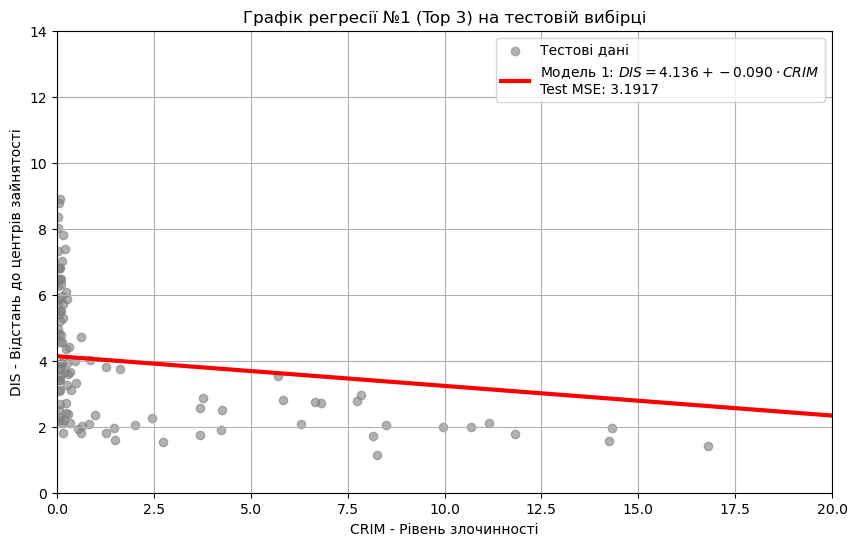

2   |   4.1212   |  -0.0899   |    3.9391    |    3.1899   


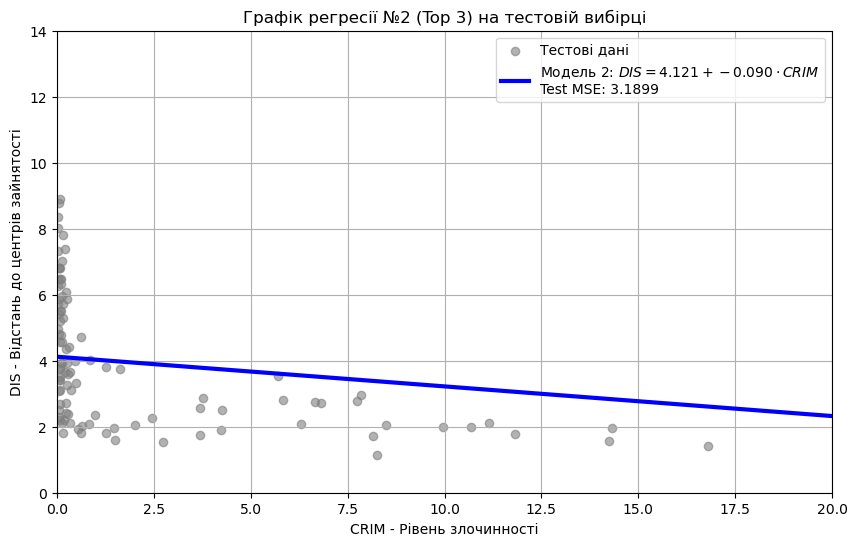

3   |   4.1515   |  -0.0899   |    3.9393    |    3.1940   


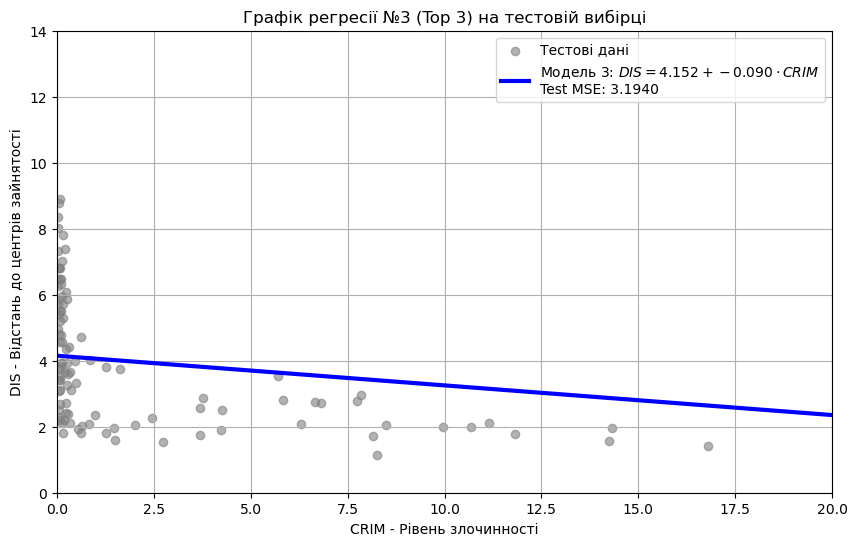

In [7]:
# --- Крок 6: Представлення похибок для трьох найкращих регресій та їх візуалізація ---
print("\n--- Крок 6: Похибки трьох найкращих моделей та їх візуалізація окремими графіками ---")

x_test = test_data['CRIM'].values
y_test = test_data['DIS'].values
top_3_models = results[:3]
x_line = np.array([0, max(selected_data['CRIM'])])

# 6.1. Виведення таблиці
print(f"{'#':<3} | {'b0':^10} | {'b1':^10} | {'Train MSE':^12} | {'Test MSE':^12}")
print("-" * 55)

for i, (train_mse, b0, b1) in enumerate(top_3_models):
    y_pred_test = b0 + b1 * x_test
    test_mse = np.mean((y_test - y_pred_test)**2)
    
    # Вивід рядка таблиці
    print(f"{i+1:<3} | {b0:^10.4f} | {b1:^10.4f} | {train_mse:^12.4f} | {test_mse:^12.4f}")
    
    # 6.2. Побудова окремого графіку для кожної моделі
    plt.figure(figsize=(10, 6))
    plt.scatter(x_test, y_test, color='gray', label='Тестові дані', alpha=0.6)
    
    # Лінія регресії
    y_line = b0 + b1 * x_line
    plt.plot(x_line, y_line, 
             color='red' if i == 0 else 'blue', # Перша модель червона, інші сині
             linewidth=3, 
             label=f'Модель {i+1}: $DIS = {b0:.3f} + {b1:.3f} \cdot CRIM$\nTest MSE: {test_mse:.4f}')

    plt.title(f'Графік регресії №{i+1} (Top 3) на тестовій вибірці')
    plt.xlabel('CRIM - Рівень злочинності')
    plt.ylabel('DIS - Відстань до центрів зайнятості')
    plt.legend()
    plt.grid(True)
    plt.ylim(0, 14)
    plt.xlim(0, 20)
    plt.show() 


--- Крок 7: Візуалізація найкращої регресії на тестових даних ---


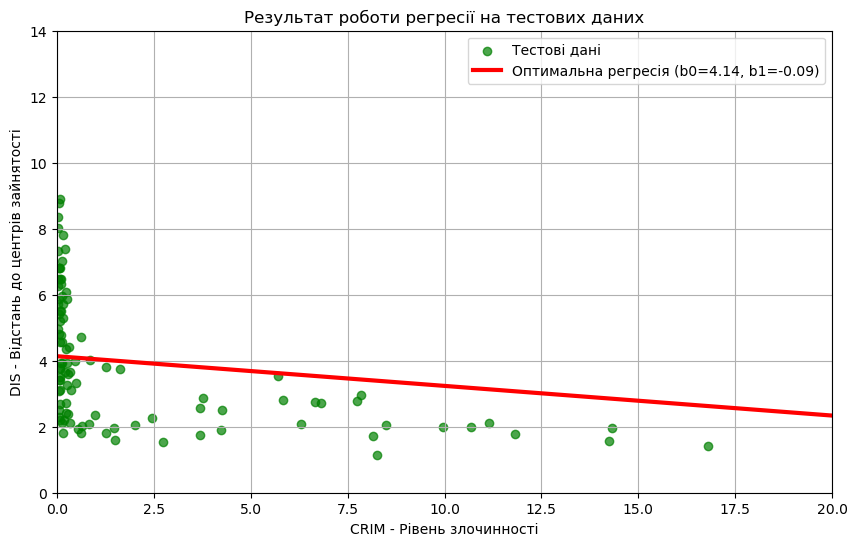

In [8]:
# --- Крок 7: Графік регресії на тестових даних (основний) ---
best_b0 = top_3_models[0][1]
best_b1 = top_3_models[0][2]

print("\n--- Крок 7: Візуалізація найкращої регресії на тестових даних ---")
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color='green', label='Тестові дані', alpha=0.7)
x_line = np.array([0, max(selected_data['CRIM'])])
y_line = best_b0 + best_b1 * x_line
plt.plot(x_line, y_line, color='red', linewidth=3, label=f'Оптимальна регресія (b0={best_b0:.2f}, b1={best_b1:.2f})')
plt.title('Результат роботи регресії на тестових даних')
plt.xlabel('CRIM - Рівень злочинності')
plt.ylabel('DIS - Відстань до центрів зайнятості')
plt.legend()
plt.grid(True)
plt.ylim(0, 14)
plt.xlim(0, 20)
plt.show()